In [1]:
include("../../src/gp_utils.jl")
include("../../src/synthetic_objective.jl")
include("../../src/bayesopt.jl")
include("../../src/reporting.jl")
include("render.jl")
# include("regret_plot.jl")

Plots.default(
    titlefont=font(14),
    guidefont=font(12),
    tickfont=font(10),
    legendfont=font(10),
    linewidth=2,
    # size=(400, 300),
    grid=false,
)

# Define the target function
function dihedral_group(n::Int)
    r_k = [[cos(2π * k / n) -sin(2π * k / n); sin(2π * k / n) cos(2π * k / n)] for k in 0:n-1]
    s_k = [[cos(2π * k / n) sin(2π * k / n); sin(2π * k / n) -cos(2π * k / n)] for k in 0:n-1]
    return [r_k; s_k]
end

G = dihedral_group(5)
T = Tuple(LinearTransform(σ) for σ in G)
θ = (
    l=0.2,
    σ_f=1.0,
    σ_n=0.1,
)
bounds = [(-1.0, 1.0), (-1.0, 1.0)]
target_function_n_points = 64
target_function_seed = 11
f = build_synthetic_objective(
    θ -> build_invariant_gp(θ, T),
    θ,
    target_function_n_points,
    bounds,
    target_function_seed,
)

x_ranges = [range(-1, 1, length=100) for _ in 1:2]
x_grid = Iterators.product(x_ranges...)
y_grid = [f(collect(x)) for x in x_grid]

100×100 Matrix{Float64}:
 -0.0218285   -0.00815847   0.00794007  …  -0.00815847  -0.0218285
 -0.0362785   -0.022053    -0.00511868     -0.022053    -0.0362785
 -0.0534263   -0.0387844   -0.0211503      -0.0387844   -0.0534263
 -0.0733474   -0.0584323   -0.0402397      -0.0584323   -0.0733474
 -0.0960292   -0.0809772   -0.0623584      -0.0809772   -0.0960292
 -0.121353    -0.10628     -0.0873439   …  -0.10628     -0.121353
 -0.14908     -0.134068    -0.114882       -0.134068    -0.14908
 -0.17883     -0.163916    -0.144495       -0.163916    -0.17883
 -0.210079    -0.195246    -0.175538       -0.195246    -0.210079
 -0.242145    -0.227318    -0.207201       -0.227318    -0.242145
  ⋮                                     ⋱               
 -0.313684    -0.320247    -0.321185       -0.320247    -0.313684
 -0.272505    -0.275142    -0.272698       -0.275142    -0.272505
 -0.226148    -0.224509    -0.21833        -0.224509    -0.226148
 -0.176973    -0.170963    -0.16091        -0.170963    -

In [2]:
using HDF5

# Load data 
standard_observations, invariant_observations = h5open("data/dihedral_progress/results.h5", "r") do file
    standard_observations = read(file, "Standard/observed_x")
    invariant_observations = read(file, "Invariant/observed_x")
    return standard_observations, invariant_observations
end

([0.43242105030481715 0.5644926388389938 … -0.055647502691286266 0.412464414955782; -0.425811600209659 -0.7484775937343052 … 0.5714803711829998 -0.374072902184428], [-0.18860105821594164 5.33377009226399e-10 … -0.26972195331711735 0.3814320802572614; -0.86290835122697 3.1547309209400964e-10 … -0.48741849203409426 -0.40822752972137866])

In [194]:
using Plots.PlotMeasures

standard_observations[1, :], standard_observations[2, :] = standard_observations[2, :], standard_observations[1, :]
invariant_observations[1, :], invariant_observations[2, :] = invariant_observations[2, :], invariant_observations[1, :]

# Standard kernel
figure1 = Plots.heatmap(
    x_ranges[1],
    x_ranges[2],
    y_grid,
    color=:viridis,
    cbar=false,
    xlabel=L"$x_1$",
    ylabel=L"$x_2$",
    colorbar_title=" \n" * L"$f(\mathbf{x})$",
    size=(300, 300),
    # left_margin=4mm,
)
Plots.scatter!(
    standard_observations[1, :],
    standard_observations[2, :],
    seriestype=:scatter,
    color=:white,
    label=nothing,
    markersize=2,
)
Plots.plot!(
    aspect_ratio=:equal,
    xlims=(-1, 1),
    ylims=(-1, 1),
    xticks=nothing,
    yticks=nothing
)
Plots.plot!(title="Standard kernel")

# Invariant kernel
figure2 = Plots.heatmap(
    x_ranges[1],
    x_ranges[2],
    y_grid,
    color=:viridis,
    cbar=true,
    xlabel=L"$x_1$",
    ylabel=L"$x_2$",
    size=(300, 300),
    colorbar_title=" \n" * L"$f(\mathbf{x})$",
    # left_margin=10mm,
)
Plots.scatter!(
    invariant_observations[1, :],
    invariant_observations[2, :],
    seriestype=:scatter,
    color=:white,
    label=nothing,
    markersize=2,
)
Plots.plot!(
    aspect_ratio=:equal,
    xlims=(-1, 1),
    ylims=(-1, 1),
    xticks=nothing,
    yticks=nothing
)
Plots.plot!(title="Invariant kernel")

Plots.plot(figure1, figure2, layout=@layout[p1{0.43w} p2{0.56w}], size=(700, 300), bottom_margin=3mm, left_margin=[5mm 5mm], right_margin=[5mm 3mm])
savefig("data/dihedral_progress/sample-efficiency.pdf")

"/home/theo/documents/ucl/bayesopt_with_invariances/experiments/synthetic/data/dihedral_progress/sample-efficiency.pdf"

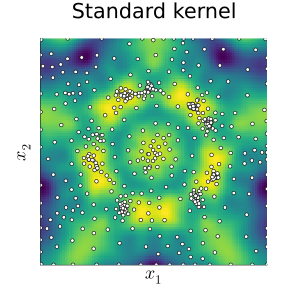

In [63]:
figure1

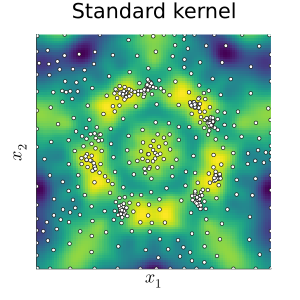

In [79]:
Plots.plot!(figure1, margin=[0Plots.PlotMeasures.mm 0Plots.PlotMeasures.mm])
figure1

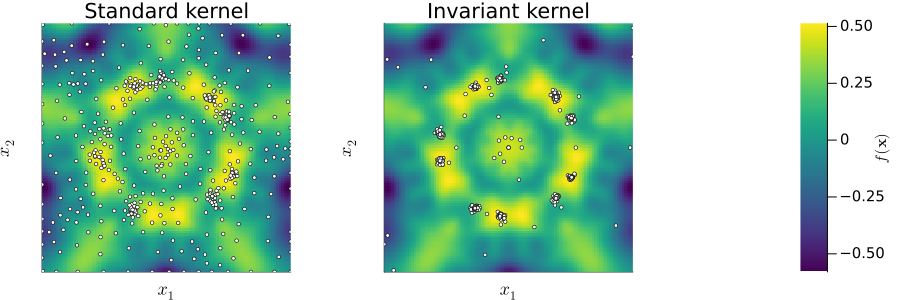

In [80]:
using Plots.PlotMeasures
Plots.plot(figure1, figure2, colorbar, layout=l, size=(900, 300), bottom_margin=2mm)
